# Prerequisites

In [55]:
import time
time_start = time.time()

In [56]:
#Install pip packages needed
#!pip install pandas numpy matplotlib seaborn scikit-learn tensorflow tensorflow-macos tensorflow-metal

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

# Importing the data

In [58]:
#Open blinks data from csv

#Make a filename that is a relative path to the data
filename = '../../Data/blinks.txt'

data = pd.read_csv(filename, sep=",", header=None)

In [59]:
#Removing columns 12-22
data = data.drop(data.columns[12:22], axis=1)
#Remove the first 1000 samples
data = data.drop(data.index[0:1000])
#Reindex the data
data = data.reset_index(drop=True)
data

,0,1,2,3,4,5,6,7,8,9,10,11,22,23
0,231.0,64830.25,50852.09,-15357.19,-20822.97,6419.09,-3598.56,7074.95,1666.50,0.038,0.770,0.604,1.557936e+12,12:00:57.322
1,232.0,65204.73,51338.89,-15532.88,-21018.39,6220.27,-3776.89,6869.58,1464.67,0.038,0.770,0.604,1.557936e+12,12:00:57.322
2,233.0,64880.61,50822.25,-15317.76,-20962.36,6507.96,-3452.81,7167.31,1747.48,0.030,0.776,0.612,1.557936e+12,12:00:57.328
3,234.0,64431.11,50216.86,-15067.89,-20703.97,6782.68,-3201.98,7451.71,2030.59,0.030,0.776,0.612,1.557936e+12,12:00:57.328
4,235.0,64745.36,50724.85,-15302.41,-20786.18,6471.43,-3542.17,7128.49,1724.59,0.030,0.776,0.612,1.557936e+12,12:00:57.336
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21486,213.0,58750.42,47034.95,-18637.04,-27128.40,-9182.90,-18376.35,-5918.16,-6498.79,0.034,0.762,0.610,1.557936e+12,12:02:23.152
21487,214.0,59029.14,47391.53,-18737.73,-27217.09,-9327.85,-18544.50,-6069.39,-6654.94,0.028,0.768,0.614,1.557936e+12,12:02:23.152
21488,215.0,58890.72,47196.80,-18850.75,-27389.65,-9400.32,-18621.62,-6141.32,-6739.32,0.028,0.768,0.614,1.557936e+12,12:02:23.159
21489,216.0,58567.63,46769.70,-18777.12,-27361.26,-9255.01,-18427.36,-5976.43,-6570.79,0.028,0.768,0.614,1.557936e+12,12:02:23.166


0        14.686
1        14.686
2        14.762
3        14.762
4        14.762
          ...  
21486    14.636
21487    14.686
21488    14.686
21489    14.686
21490    14.686
Length: 21491, dtype: float64


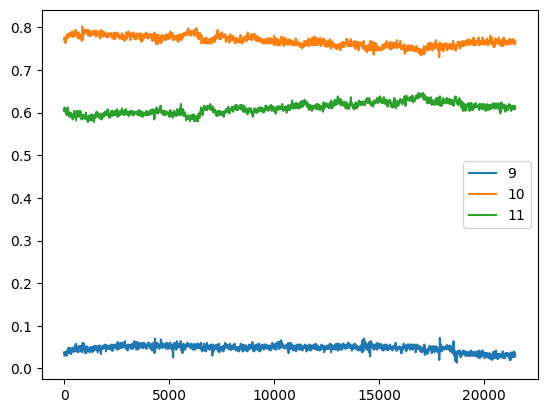

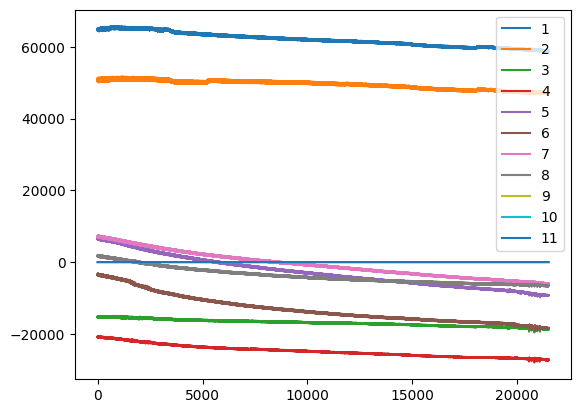

In [60]:
#Create a dataframe for the data, columns 1-11
useful_data = data.iloc[:,1:12]

#Create alpha labels, columns 9-11
alphaLabels = data.iloc[:,9:12]

#Create a 1d dataframe of the alphas summed
alphaSum = alphaLabels.mul([9,10,11]).sum(axis=1)

#Plot alpha labels
alphaLabels.plot()

#Ploting the data
useful_data.plot()

print(alphaSum)

In [61]:
n_samps = 21490
n_blinks = 40
lenRangeDown = 30
lenRangeUp = 60
labels = pd.DataFrame()

#Append 21491 norm labels to the dataframe
for i in range(n_samps):
    labels = labels._append(['norm'])

#Generate random blink labels
for _ in range(n_blinks):
    # Randomly select the start and end indices for each blink
    start_idx = random.randint(0, n_samps - lenRangeUp)
    end_idx = start_idx + random.randint(lenRangeDown, lenRangeUp)
    
    # Set the blink labels for the selected range
    for i in range(start_idx, end_idx):
        labels.iloc[i] = 'blink'

labels.value_counts()

norm     19743
blink     1748
Name: count, dtype: int64

# TensorFlow GPU setup

In [62]:
#Convert labels to numeric
labels = labels.replace('norm', 0)
labels = labels.replace('blink', 1)

#Reingex the labels
labels = labels.reset_index(drop=True)

In [63]:
#Splitting data with scikit-learn
X_train, X_test, y_train, y_test = train_test_split(useful_data, labels, test_size=0.2, random_state=42)

In [64]:
model = keras.Sequential([
    keras.layers.Input(shape=(11,)),  # Adjust the input shape based on your data
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')  # Output layer with sigmoid activation for binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [65]:
# Convert Pandas Series to NumPy arrays
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

history = model.fit(X_train, y_train, epochs=10, batch_size=32)

# Evaluate the model's training error
trainPred = model.predict(X_train)

correctTrain = 0
for i in range(len(trainPred)):
    if trainPred[i] >= 0.5 and y_train[i] == 1:
        correctTrain += 1
    elif trainPred[i] < 0.5 and y_train[i] == 0:
        correctTrain += 1
    else:
        continue

print('Training accuracy:', correctTrain/len(trainPred))

# Evaluate the model's test error
testPred = model.predict(X_test)

correctTest = 0
for i in range(len(testPred)):
    if testPred[i] >= 0.5 and y_test[i] == 1:
        correctTest += 1
    elif testPred[i] < 0.5 and y_test[i] == 0:
        correctTest += 1
    else:
        continue

print('Test accuracy:', correctTest/len(testPred))


Epoch 1/10
538/538 [==============================] - 5s 8ms/step - loss: 95.5533 - accuracy: 0.8484
Epoch 2/10
538/538 [==============================] - 4s 8ms/step - loss: 70.2618 - accuracy: 0.8520
Epoch 3/10
538/538 [==============================] - 4s 8ms/step - loss: 63.3270 - accuracy: 0.8474
Epoch 4/10
538/538 [==============================] - 4s 8ms/step - loss: 62.3394 - accuracy: 0.8497
Epoch 5/10
538/538 [==============================] - 4s 8ms/step - loss: 58.5118 - accuracy: 0.8493
Epoch 6/10
538/538 [==============================] - 4s 8ms/step - loss: 48.6783 - accuracy: 0.8498
Epoch 7/10
538/538 [==============================] - 4s 8ms/step - loss: 59.0525 - accuracy: 0.8478
Epoch 8/10
538/538 [==============================] - 4s 8ms/step - loss: 63.0791 - accuracy: 0.8523
Epoch 9/10
538/538 [==============================] - 4s 8ms/step - loss: 54.4542 - accuracy: 0.8489
Epoch 10/10
538/538 [==============================] - 1s 2ms/step
Training accuracy: 0.917

# Collecting the results

# Notebook Runtime

In [66]:
#Time to finish
time_end = time.time()
print('Time to finish:', time_end - time_start, 'seconds')

Time to finish: 47.71172881126404 seconds
